In [1]:
from sympy import *
import numpy as np
init_printing(use_unicode = True)
%load_ext rpy2.ipython 

In [2]:
%%R
source("functionsGenerateEdgeForPy.R")

In [3]:
def trunc2(expr, pwr, step = 0.5):
    '''
    truncates an expression
    pwr is a limiting power of n
    '''
    expr = expr.expand()  # needed for coeff() method but takes a long time
    term_list = [expr.coeff(n**step, p)*n**(p*step) for p in np.linspace(0, pwr/step, num = abs(pwr)/step + 1)[1:]]
    return sum(term_list, expr.coeff(n, 0))

# collect by powers of (it)
def collect_it(expr, pwr, step = 1/2):
    '''
    collect by "it" in each term separately
    '''
    expr = expr.expand()
    term_list = [expr.coeff(n**step, p).collect(it) * n**(p*step)
                 for p in np.linspace(0, pwr/step, num = abs(pwr)/step + 1)[1:]]
    return sum(term_list, expr.coeff(n, 0))    

def hermite_prob(n):
    '''
    generate Physicists' Hermite polynomial
    convert into Probabilists' Hermite polynomial
    '''
    x = var('x')
    Hprob = 2**(-n/sympify(2)) * hermite(n, x*2**(-1/sympify(2)))
    if (n == 0):
        return(Hprob)
    return(Hprob.expand())

In [4]:
n, A, B, C, D, sigma, mu2, mu3, mu4, mu5, mu6, mu7, mu8, mu9, mu10, mu11, mu12, mu13, mu14, lambda3, lambda4, lambda5, lambda6, it, m, x, r = var('n, A, B, C, D, sigma, mu2, mu3, mu4, mu5, mu6, mu7, mu8, mu9, mu10, mu11, mu12, mu13, mu14, lambda3, lambda4, lambda5, lambda6, it, m, x, r')

In [5]:
%%capture
%%R 
K <- 4
comb <- generateComb(K)
generateAssignments(comb, "nu")

In [6]:
nu00 = 1
nu10 = 0
nu20 =  (1*n*mu2**1 ) / n**2
nu30 =  (1*n*mu3**1 ) / n**3
nu40 =  (3*n*(n-1)*mu2**2 +   1*n*mu4**1 ) / n**4
nu50 =  (10*n*(n-1)*mu3**1*mu2**1 +    1*n*mu5**1 ) / n**5
nu60 =  (15*n*(n-1)*(n-2)*mu2**3 +   15*n*(n-1)*mu4**1*mu2**1 +   10*n*(n-1)*mu3**2 +    1*n*mu6**1 ) / n**6
nu70 =  (105*n*(n-1)*(n-2)*mu3**1*mu2**2 +    21*n*(n-1)*mu5**1*mu2**1 +    35*n*(n-1)*mu4**1*mu3**1 +     1*n*mu7**1 ) / n**7
nu80 =  (105*n*(n-1)*(n-2)*(n-3)*mu2**4 +   210*n*(n-1)*(n-2)*mu4**1*mu2**2 +   280*n*(n-1)*(n-2)*mu3**2*mu2**1 +    28*n*(n-1)*mu6**1*mu2**1 +    56*n*(n-1)*mu5**1*mu3**1 +    35*n*(n-1)*mu4**2 +     1*n*mu8**1 ) / n**8
nu90 =  (1260*n*(n-1)*(n-2)*(n-3)*mu3**1*mu2**3 +    378*n*(n-1)*(n-2)*mu5**1*mu2**2 +   1260*n*(n-1)*(n-2)*mu4**1*mu3**1*mu2**1 +     36*n*(n-1)*mu7**1*mu2**1 +    280*n*(n-1)*(n-2)*mu3**3 +     84*n*(n-1)*mu6**1*mu3**1 +    126*n*(n-1)*mu5**1*mu4**1 +      1*n*mu9**1 ) / n**9
nu100 =  (   1*n*mu10**1 +    945*n*(n-1)*(n-2)*(n-3)*(n-4)*mu2**5 +   3150*n*(n-1)*(n-2)*(n-3)*mu4**1*mu2**3 +   6300*n*(n-1)*(n-2)*(n-3)*mu3**2*mu2**2 +    630*n*(n-1)*(n-2)*mu6**1*mu2**2 +   2520*n*(n-1)*(n-2)*mu5**1*mu3**1*mu2**1 +   1575*n*(n-1)*(n-2)*mu4**2*mu2**1 +     45*n*(n-1)*mu8**1*mu2**1 +   2100*n*(n-1)*(n-2)*mu4**1*mu3**2 +    120*n*(n-1)*mu7**1*mu3**1 +    210*n*(n-1)*mu6**1*mu4**1 +    126*n*(n-1)*mu5**2 ) / n**10
nu01 =  (1*n*mu2**1 ) / n**1
nu11 =  (1*n*mu3**1 ) / n**2
nu21 =  (1*n*(n-1)*mu2**2 +   1*n*mu4**1 ) / n**3
nu31 =  (4*n*(n-1)*mu3**1*mu2**1 +   1*n*mu5**1 ) / n**4
nu41 =  (3*n*(n-1)*(n-2)*mu2**3 +   7*n*(n-1)*mu4**1*mu2**1 +   4*n*(n-1)*mu3**2 +   1*n*mu6**1 ) / n**5
nu51 =  (25*n*(n-1)*(n-2)*mu3**1*mu2**2 +   11*n*(n-1)*mu5**1*mu2**1 +   15*n*(n-1)*mu4**1*mu3**1 +    1*n*mu7**1 ) / n**6
nu61 =  (15*n*(n-1)*(n-2)*(n-3)*mu2**4 +   60*n*(n-1)*(n-2)*mu4**1*mu2**2 +   70*n*(n-1)*(n-2)*mu3**2*mu2**1 +   16*n*(n-1)*mu6**1*mu2**1 +   26*n*(n-1)*mu5**1*mu3**1 +   15*n*(n-1)*mu4**2 +    1*n*mu8**1 ) / n**7
nu71 =  (210*n*(n-1)*(n-2)*(n-3)*mu3**1*mu2**3 +   126*n*(n-1)*(n-2)*mu5**1*mu2**2 +   350*n*(n-1)*(n-2)*mu4**1*mu3**1*mu2**1 +    22*n*(n-1)*mu7**1*mu2**1 +    70*n*(n-1)*(n-2)*mu3**3 +    42*n*(n-1)*mu6**1*mu3**1 +    56*n*(n-1)*mu5**1*mu4**1 +     1*n*mu9**1 ) / n**8
nu81 =  (   1*n*mu10**1 +    105*n*(n-1)*(n-2)*(n-3)*(n-4)*mu2**5 +    630*n*(n-1)*(n-2)*(n-3)*mu4**1*mu2**3 +   1120*n*(n-1)*(n-2)*(n-3)*mu3**2*mu2**2 +    238*n*(n-1)*(n-2)*mu6**1*mu2**2 +    784*n*(n-1)*(n-2)*mu5**1*mu3**1*mu2**1 +    455*n*(n-1)*(n-2)*mu4**2*mu2**1 +     29*n*(n-1)*mu8**1*mu2**1 +    560*n*(n-1)*(n-2)*mu4**1*mu3**2 +     64*n*(n-1)*mu7**1*mu3**1 +     98*n*(n-1)*mu6**1*mu4**1 +     56*n*(n-1)*mu5**2 ) / n**9
nu02 =  (1*n*(n-1)*mu2**2 +   1*n*mu4**1 ) / n**2
nu12 =  (2*n*(n-1)*mu3**1*mu2**1 +   1*n*mu5**1 ) / n**3
nu22 =  (1*n*(n-1)*(n-2)*mu2**3 +   3*n*(n-1)*mu4**1*mu2**1 +   2*n*(n-1)*mu3**2 +   1*n*mu6**1 ) / n**4
nu32 =  (7*n*(n-1)*(n-2)*mu3**1*mu2**2 +   5*n*(n-1)*mu5**1*mu2**1 +   7*n*(n-1)*mu4**1*mu3**1 +   1*n*mu7**1 ) / n**5
nu42 =  ( 3*n*(n-1)*(n-2)*(n-3)*mu2**4 +   16*n*(n-1)*(n-2)*mu4**1*mu2**2 +   20*n*(n-1)*(n-2)*mu3**2*mu2**1 +    8*n*(n-1)*mu6**1*mu2**1 +   12*n*(n-1)*mu5**1*mu3**1 +    7*n*(n-1)*mu4**2 +    1*n*mu8**1 ) / n**6
nu52 =  ( 40*n*(n-1)*(n-2)*(n-3)*mu3**1*mu2**3 +    36*n*(n-1)*(n-2)*mu5**1*mu2**2 +   100*n*(n-1)*(n-2)*mu4**1*mu3**1*mu2**1 +    12*n*(n-1)*mu7**1*mu2**1 +    20*n*(n-1)*(n-2)*mu3**3 +    20*n*(n-1)*mu6**1*mu3**1 +    26*n*(n-1)*mu5**1*mu4**1 +     1*n*mu9**1 ) / n**7
nu62 =  (  1*n*mu10**1 +    15*n*(n-1)*(n-2)*(n-3)*(n-4)*mu2**5 +   120*n*(n-1)*(n-2)*(n-3)*mu4**1*mu2**3 +   220*n*(n-1)*(n-2)*(n-3)*mu3**2*mu2**2 +    76*n*(n-1)*(n-2)*mu6**1*mu2**2 +   232*n*(n-1)*(n-2)*mu5**1*mu3**1*mu2**1 +   135*n*(n-1)*(n-2)*mu4**2*mu2**1 +    17*n*(n-1)*mu8**1*mu2**1 +   160*n*(n-1)*(n-2)*mu4**1*mu3**2 +    32*n*(n-1)*mu7**1*mu3**1 +    46*n*(n-1)*mu6**1*mu4**1 +    26*n*(n-1)*mu5**2 ) / n**8
nu72 =  (   1*n*mu11**1 +    315*n*(n-1)*(n-2)*(n-3)*(n-4)*mu3**1*mu2**4 +    336*n*(n-1)*(n-2)*(n-3)*mu5**1*mu2**3 +   1400*n*(n-1)*(n-2)*(n-3)*mu4**1*mu3**1*mu2**2 +    148*n*(n-1)*(n-2)*mu7**1*mu2**2 +    560*n*(n-1)*(n-2)*(n-3)*mu3**3*mu2**1 +    504*n*(n-1)*(n-2)*mu6**1*mu3**1*mu2**1 +    658*n*(n-1)*(n-2)*mu5**1*mu4**1*mu2**1 +     23*n*(n-1)*mu9**1*mu2**1 +    392*n*(n-1)*(n-2)*mu5**1*mu3**2 +    455*n*(n-1)*(n-2)*mu4**2*mu3**1 +     49*n*(n-1)*mu8**1*mu3**1 +     78*n*(n-1)*mu7**1*mu4**1 +     98*n*(n-1)*mu6**1*mu5**1 ) / n**9
nu82 =  (   1*n*mu12**1 +     30*n*(n-1)*mu2**1*mu10**1 +    105*n*(n-1)*(n-2)*(n-3)*(n-4)*(n-5)*mu2**6 +   1155*n*(n-1)*(n-2)*(n-3)*(n-4)*mu4**1*mu2**4 +   2800*n*(n-1)*(n-2)*(n-3)*(n-4)*mu3**2*mu2**3 +    868*n*(n-1)*(n-2)*(n-3)*mu6**1*mu2**3 +   4032*n*(n-1)*(n-2)*(n-3)*mu5**1*mu3**1*mu2**2 +   2345*n*(n-1)*(n-2)*(n-3)*mu4**2*mu2**2 +    267*n*(n-1)*(n-2)*mu8**1*mu2**2 +   5600*n*(n-1)*(n-2)*(n-3)*mu4**1*mu3**2*mu2**1 +   1024*n*(n-1)*(n-2)*mu7**1*mu3**1*mu2**1 +   1484*n*(n-1)*(n-2)*mu6**1*mu4**1*mu2**1 +    840*n*(n-1)*(n-2)*mu5**2*mu2**1 +    560*n*(n-1)*(n-2)*(n-3)*mu3**4 +    896*n*(n-1)*(n-2)*mu6**1*mu3**2 +   2352*n*(n-1)*(n-2)*mu5**1*mu4**1*mu3**1 +     72*n*(n-1)*mu9**1*mu3**1 +    455*n*(n-1)*(n-2)*mu4**3 +    127*n*(n-1)*mu8**1*mu4**1 +    176*n*(n-1)*mu7**1*mu5**1 +     98*n*(n-1)*mu6**2 ) / n**10
nu03 =  (1*n*(n-1)*(n-2)*mu2**3 +   3*n*(n-1)*mu4**1*mu2**1 +   1*n*mu6**1 ) / n**3
nu13 =  (3*n*(n-1)*(n-2)*mu3**1*mu2**2 +   3*n*(n-1)*mu5**1*mu2**1 +   3*n*(n-1)*mu4**1*mu3**1 +   1*n*mu7**1 ) / n**4
nu23 =  (1*n*(n-1)*(n-2)*(n-3)*mu2**4 +   6*n*(n-1)*(n-2)*mu4**1*mu2**2 +   6*n*(n-1)*(n-2)*mu3**2*mu2**1 +   4*n*(n-1)*mu6**1*mu2**1 +   6*n*(n-1)*mu5**1*mu3**1 +   3*n*(n-1)*mu4**2 +   1*n*mu8**1 ) / n**5
nu33 =  (10*n*(n-1)*(n-2)*(n-3)*mu3**1*mu2**3 +   12*n*(n-1)*(n-2)*mu5**1*mu2**2 +   30*n*(n-1)*(n-2)*mu4**1*mu3**1*mu2**1 +    6*n*(n-1)*mu7**1*mu2**1 +    6*n*(n-1)*(n-2)*mu3**3 +   10*n*(n-1)*mu6**1*mu3**1 +   12*n*(n-1)*mu5**1*mu4**1 +    1*n*mu9**1 ) / n**6
nu43 =  ( 1*n*mu10**1 +    3*n*(n-1)*(n-2)*(n-3)*(n-4)*mu2**5 +   28*n*(n-1)*(n-2)*(n-3)*mu4**1*mu2**3 +   48*n*(n-1)*(n-2)*(n-3)*mu3**2*mu2**2 +   24*n*(n-1)*(n-2)*mu6**1*mu2**2 +   72*n*(n-1)*(n-2)*mu5**1*mu3**1*mu2**1 +   39*n*(n-1)*(n-2)*mu4**2*mu2**1 +    9*n*(n-1)*mu8**1*mu2**1 +   48*n*(n-1)*(n-2)*mu4**1*mu3**2 +   16*n*(n-1)*mu7**1*mu3**1 +   22*n*(n-1)*mu6**1*mu4**1 +   12*n*(n-1)*mu5**2 ) / n**7
nu53 =  (  1*n*mu11**1 +    55*n*(n-1)*(n-2)*(n-3)*(n-4)*mu3**1*mu2**4 +    76*n*(n-1)*(n-2)*(n-3)*mu5**1*mu2**3 +   300*n*(n-1)*(n-2)*(n-3)*mu4**1*mu3**1*mu2**2 +    48*n*(n-1)*(n-2)*mu7**1*mu2**2 +   120*n*(n-1)*(n-2)*(n-3)*mu3**3*mu2**1 +   160*n*(n-1)*(n-2)*mu6**1*mu3**1*mu2**1 +   198*n*(n-1)*(n-2)*mu5**1*mu4**1*mu2**1 +    13*n*(n-1)*mu9**1*mu2**1 +   120*n*(n-1)*(n-2)*mu5**1*mu3**2 +   135*n*(n-1)*(n-2)*mu4**2*mu3**1 +    25*n*(n-1)*mu8**1*mu3**1 +    38*n*(n-1)*mu7**1*mu4**1 +    46*n*(n-1)*mu6**1*mu5**1 ) / n**8
nu63 =  (   1*n*mu12**1 +     18*n*(n-1)*mu2**1*mu10**1 +     15*n*(n-1)*(n-2)*(n-3)*(n-4)*(n-5)*mu2**6 +    195*n*(n-1)*(n-2)*(n-3)*(n-4)*mu4**1*mu2**4 +    460*n*(n-1)*(n-2)*(n-3)*(n-4)*mu3**2*mu2**3 +    196*n*(n-1)*(n-2)*(n-3)*mu6**1*mu2**3 +    888*n*(n-1)*(n-2)*(n-3)*mu5**1*mu3**1*mu2**2 +    495*n*(n-1)*(n-2)*(n-3)*mu4**2*mu2**2 +     93*n*(n-1)*(n-2)*mu8**1*mu2**2 +   1200*n*(n-1)*(n-2)*(n-3)*mu4**1*mu3**2*mu2**1 +    336*n*(n-1)*(n-2)*mu7**1*mu3**1*mu2**1 +    468*n*(n-1)*(n-2)*mu6**1*mu4**1*mu2**1 +    258*n*(n-1)*(n-2)*mu5**2*mu2**1 +    120*n*(n-1)*(n-2)*(n-3)*mu3**4 +    280*n*(n-1)*(n-2)*mu6**1*mu3**2 +    708*n*(n-1)*(n-2)*mu5**1*mu4**1*mu3**1 +     38*n*(n-1)*mu9**1*mu3**1 +    135*n*(n-1)*(n-2)*mu4**3 +     63*n*(n-1)*mu8**1*mu4**1 +     84*n*(n-1)*mu7**1*mu5**1 +     46*n*(n-1)*mu6**2 ) / n**9
nu04 =  (1*n*(n-1)*(n-2)*(n-3)*mu2**4 +   6*n*(n-1)*(n-2)*mu4**1*mu2**2 +   4*n*(n-1)*mu6**1*mu2**1 +   3*n*(n-1)*mu4**2 +   1*n*mu8**1 ) / n**4
nu14 =  ( 4*n*(n-1)*(n-2)*(n-3)*mu3**1*mu2**3 +    6*n*(n-1)*(n-2)*mu5**1*mu2**2 +   12*n*(n-1)*(n-2)*mu4**1*mu3**1*mu2**1 +    4*n*(n-1)*mu7**1*mu2**1 +    4*n*(n-1)*mu6**1*mu3**1 +    6*n*(n-1)*mu5**1*mu4**1 +    1*n*mu9**1 ) / n**5
nu24 =  ( 1*n*mu10**1 +    1*n*(n-1)*(n-2)*(n-3)*(n-4)*mu2**5 +   10*n*(n-1)*(n-2)*(n-3)*mu4**1*mu2**3 +   12*n*(n-1)*(n-2)*(n-3)*mu3**2*mu2**2 +   10*n*(n-1)*(n-2)*mu6**1*mu2**2 +   24*n*(n-1)*(n-2)*mu5**1*mu3**1*mu2**1 +   15*n*(n-1)*(n-2)*mu4**2*mu2**1 +    5*n*(n-1)*mu8**1*mu2**1 +   12*n*(n-1)*(n-2)*mu4**1*mu3**2 +    8*n*(n-1)*mu7**1*mu3**1 +   10*n*(n-1)*mu6**1*mu4**1 +    6*n*(n-1)*mu5**2 ) / n**6
nu34 =  ( 1*n*mu11**1 +   13*n*(n-1)*(n-2)*(n-3)*(n-4)*mu3**1*mu2**4 +   22*n*(n-1)*(n-2)*(n-3)*mu5**1*mu2**3 +   78*n*(n-1)*(n-2)*(n-3)*mu4**1*mu3**1*mu2**2 +   18*n*(n-1)*(n-2)*mu7**1*mu2**2 +   24*n*(n-1)*(n-2)*(n-3)*mu3**3*mu2**1 +   52*n*(n-1)*(n-2)*mu6**1*mu3**1*mu2**1 +   66*n*(n-1)*(n-2)*mu5**1*mu4**1*mu2**1 +    7*n*(n-1)*mu9**1*mu2**1 +   36*n*(n-1)*(n-2)*mu5**1*mu3**2 +   39*n*(n-1)*(n-2)*mu4**2*mu3**1 +   13*n*(n-1)*mu8**1*mu3**1 +   18*n*(n-1)*mu7**1*mu4**1 +   22*n*(n-1)*mu6**1*mu5**1 ) / n**7
nu44 =  (  1*n*mu12**1 +    10*n*(n-1)*mu2**1*mu10**1 +     3*n*(n-1)*(n-2)*(n-3)*(n-4)*(n-5)*mu2**6 +    43*n*(n-1)*(n-2)*(n-3)*(n-4)*mu4**1*mu2**4 +    88*n*(n-1)*(n-2)*(n-3)*(n-4)*mu3**2*mu2**3 +    52*n*(n-1)*(n-2)*(n-3)*mu6**1*mu2**3 +   216*n*(n-1)*(n-2)*(n-3)*mu5**1*mu3**1*mu2**2 +   123*n*(n-1)*(n-2)*(n-3)*mu4**2*mu2**2 +    33*n*(n-1)*(n-2)*mu8**1*mu2**2 +   264*n*(n-1)*(n-2)*(n-3)*mu4**1*mu3**2*mu2**1 +   112*n*(n-1)*(n-2)*mu7**1*mu3**1*mu2**1 +   148*n*(n-1)*(n-2)*mu6**1*mu4**1*mu2**1 +    84*n*(n-1)*(n-2)*mu5**2*mu2**1 +    24*n*(n-1)*(n-2)*(n-3)*mu3**4 +    88*n*(n-1)*(n-2)*mu6**1*mu3**2 +   216*n*(n-1)*(n-2)*mu5**1*mu4**1*mu3**1 +    20*n*(n-1)*mu9**1*mu3**1 +    39*n*(n-1)*(n-2)*mu4**3 +    31*n*(n-1)*mu8**1*mu4**1 +    40*n*(n-1)*mu7**1*mu5**1 +    22*n*(n-1)*mu6**2 ) / n**8
nu54 =  (  1*n*mu13**1 +    14*n*(n-1)*mu2**1*mu11**1 +    70*n*(n-1)*(n-2)*(n-3)*(n-4)*(n-5)*mu3**1*mu2**5 +   131*n*(n-1)*(n-2)*(n-3)*(n-4)*mu5**1*mu2**4 +   660*n*(n-1)*(n-2)*(n-3)*(n-4)*mu4**1*mu3**1*mu2**3 +   124*n*(n-1)*(n-2)*(n-3)*mu7**1*mu2**3 +   360*n*(n-1)*(n-2)*(n-3)*(n-4)*mu3**3*mu2**2 +   580*n*(n-1)*(n-2)*(n-3)*mu6**1*mu3**1*mu2**2 +   726*n*(n-1)*(n-2)*(n-3)*mu5**1*mu4**1*mu2**2 +    61*n*(n-1)*(n-2)*mu9**1*mu2**2 +   840*n*(n-1)*(n-2)*(n-3)*mu5**1*mu3**2*mu2**1 +   930*n*(n-1)*(n-2)*(n-3)*mu4**2*mu3**1*mu2**1 +   230*n*(n-1)*(n-2)*mu8**1*mu3**1*mu2**1 +   332*n*(n-1)*(n-2)*mu7**1*mu4**1*mu2**1 +   404*n*(n-1)*(n-2)*mu6**1*mu5**1*mu2**1 +    30*n*(n-1)*mu3**1*mu10**1 +   360*n*(n-1)*(n-2)*(n-3)*mu4**1*mu3**3 +   200*n*(n-1)*(n-2)*mu7**1*mu3**2 +   540*n*(n-1)*(n-2)*mu6**1*mu4**1*mu3**1 +   300*n*(n-1)*(n-2)*mu5**2*mu3**1 +   333*n*(n-1)*(n-2)*mu5**1*mu4**2 +    51*n*(n-1)*mu9**1*mu4**1 +    71*n*(n-1)*mu8**1*mu5**1 +    84*n*(n-1)*mu7**1*mu6**1 ) / n**9
nu64 =  (   1*n*mu14**1 +     19*n*(n-1)*mu2**1*mu12**1 +    111*n*(n-1)*(n-2)*mu2**2*mu10**1 +     15*n*(n-1)*(n-2)*(n-3)*(n-4)*(n-5)*(n-6)*mu2**7 +    285*n*(n-1)*(n-2)*(n-3)*(n-4)*(n-5)*mu4**1*mu2**5 +    790*n*(n-1)*(n-2)*(n-3)*(n-4)*(n-5)*mu3**2*mu2**4 +    391*n*(n-1)*(n-2)*(n-3)*(n-4)*mu6**1*mu2**4 +   2264*n*(n-1)*(n-2)*(n-3)*(n-4)*mu5**1*mu3**1*mu2**3 +   1275*n*(n-1)*(n-2)*(n-3)*(n-4)*mu4**2*mu2**3 +    289*n*(n-1)*(n-2)*(n-3)*mu8**1*mu2**3 +   4380*n*(n-1)*(n-2)*(n-3)*(n-4)*mu4**1*mu3**2*mu2**2 +   1512*n*(n-1)*(n-2)*(n-3)*mu7**1*mu3**1*mu2**2 +   2046*n*(n-1)*(n-2)*(n-3)*mu6**1*mu4**1*mu2**2 +   1146*n*(n-1)*(n-2)*(n-3)*mu5**2*mu2**2 +    840*n*(n-1)*(n-2)*(n-3)*(n-4)*mu3**4*mu2**1 +   2440*n*(n-1)*(n-2)*(n-3)*mu6**1*mu3**2*mu2**1 +   6072*n*(n-1)*(n-2)*(n-3)*mu5**1*mu4**1*mu3**1*mu2**1 +    452*n*(n-1)*(n-2)*mu9**1*mu3**1*mu2**1 +   1125*n*(n-1)*(n-2)*(n-3)*mu4**3*mu2**1 +    717*n*(n-1)*(n-2)*mu8**1*mu4**1*mu2**1 +    936*n*(n-1)*(n-2)*mu7**1*mu5**1*mu2**1 +    514*n*(n-1)*(n-2)*mu6**2*mu2**1 +     44*n*(n-1)*mu3**1*mu11**1 +   1200*n*(n-1)*(n-2)*(n-3)*mu5**1*mu3**3 +   2010*n*(n-1)*(n-2)*(n-3)*mu4**2*mu3**2 +    430*n*(n-1)*(n-2)*mu8**1*mu3**2 +   1272*n*(n-1)*(n-2)*mu7**1*mu4**1*mu3**1 +   1544*n*(n-1)*(n-2)*mu6**1*mu5**1*mu3**1 +     81*n*(n-1)*mu4**1*mu10**1 +    873*n*(n-1)*(n-2)*mu6**1*mu4**2 +    966*n*(n-1)*(n-2)*mu5**2*mu4**1 +    122*n*(n-1)*mu9**1*mu5**1 +    155*n*(n-1)*mu8**1*mu6**1 +     84*n*(n-1)*mu7**2 ) / n**10

In [8]:
%%capture
%%R
cat(paste(mapply(function(k, l) generateRho("rho", "nu", k, l),
                 comb[, 1], comb[, 2]), collapse = "\n")) 

In [8]:
rho00 = 1*nu00*mu2**0
rho10 = 1*nu10*mu2**0
rho20 = 1*nu20*mu2**0
rho30 = 1*nu30*mu2**0
rho40 = 1*nu40*mu2**0
rho50 = 1*nu50*mu2**0
rho60 = 1*nu60*mu2**0
rho70 = 1*nu70*mu2**0
rho80 = 1*nu80*mu2**0
rho90 = 1*nu90*mu2**0
rho100 = 1*nu100*mu2**0
rho01 = 1*nu01*mu2**0 - 1*nu00*mu2**1
rho11 = 1*nu11*mu2**0 - 1*nu10*mu2**1
rho21 = 1*nu21*mu2**0 - 1*nu20*mu2**1
rho31 = 1*nu31*mu2**0 - 1*nu30*mu2**1
rho41 = 1*nu41*mu2**0 - 1*nu40*mu2**1
rho51 = 1*nu51*mu2**0 - 1*nu50*mu2**1
rho61 = 1*nu61*mu2**0 - 1*nu60*mu2**1
rho71 = 1*nu71*mu2**0 - 1*nu70*mu2**1
rho81 = 1*nu81*mu2**0 - 1*nu80*mu2**1
rho02 = 1*nu02*mu2**0 - 2*nu01*mu2**1 + 1*nu00*mu2**2
rho12 = 1*nu12*mu2**0 - 2*nu11*mu2**1 + 1*nu10*mu2**2
rho22 = 1*nu22*mu2**0 - 2*nu21*mu2**1 + 1*nu20*mu2**2
rho32 = 1*nu32*mu2**0 - 2*nu31*mu2**1 + 1*nu30*mu2**2
rho42 = 1*nu42*mu2**0 - 2*nu41*mu2**1 + 1*nu40*mu2**2
rho52 = 1*nu52*mu2**0 - 2*nu51*mu2**1 + 1*nu50*mu2**2
rho62 = 1*nu62*mu2**0 - 2*nu61*mu2**1 + 1*nu60*mu2**2
rho72 = 1*nu72*mu2**0 - 2*nu71*mu2**1 + 1*nu70*mu2**2
rho82 = 1*nu82*mu2**0 - 2*nu81*mu2**1 + 1*nu80*mu2**2
rho03 = 1*nu03*mu2**0 - 3*nu02*mu2**1 + 3*nu01*mu2**2 - 1*nu00*mu2**3
rho13 = 1*nu13*mu2**0 - 3*nu12*mu2**1 + 3*nu11*mu2**2 - 1*nu10*mu2**3
rho23 = 1*nu23*mu2**0 - 3*nu22*mu2**1 + 3*nu21*mu2**2 - 1*nu20*mu2**3
rho33 = 1*nu33*mu2**0 - 3*nu32*mu2**1 + 3*nu31*mu2**2 - 1*nu30*mu2**3
rho43 = 1*nu43*mu2**0 - 3*nu42*mu2**1 + 3*nu41*mu2**2 - 1*nu40*mu2**3
rho53 = 1*nu53*mu2**0 - 3*nu52*mu2**1 + 3*nu51*mu2**2 - 1*nu50*mu2**3
rho63 = 1*nu63*mu2**0 - 3*nu62*mu2**1 + 3*nu61*mu2**2 - 1*nu60*mu2**3
rho04 = 1*nu04*mu2**0 - 4*nu03*mu2**1 + 6*nu02*mu2**2 - 4*nu01*mu2**3 + 1*nu00*mu2**4
rho14 = 1*nu14*mu2**0 - 4*nu13*mu2**1 + 6*nu12*mu2**2 - 4*nu11*mu2**3 + 1*nu10*mu2**4
rho24 = 1*nu24*mu2**0 - 4*nu23*mu2**1 + 6*nu22*mu2**2 - 4*nu21*mu2**3 + 1*nu20*mu2**4
rho34 = 1*nu34*mu2**0 - 4*nu33*mu2**1 + 6*nu32*mu2**2 - 4*nu31*mu2**3 + 1*nu30*mu2**4
rho44 = 1*nu44*mu2**0 - 4*nu43*mu2**1 + 6*nu42*mu2**2 - 4*nu41*mu2**3 + 1*nu40*mu2**4
rho54 = 1*nu54*mu2**0 - 4*nu53*mu2**1 + 6*nu52*mu2**2 - 4*nu51*mu2**3 + 1*nu50*mu2**4
rho64 = 1*nu64*mu2**0 - 4*nu63*mu2**1 + 6*nu62*mu2**2 - 4*nu61*mu2**3 + 1*nu60*mu2**4

In [9]:
%%capture
%%R
generateETheta(K) 

In [10]:
ET1 = n**(1/2) * A**(-1/2) * (rho10 + -sympify(1)/2*(B/A)**1 * rho11 + sympify(3)/8*(B/A)**2 * rho12 + sympify(1)/2*(B/A)**1 * rho30 + -sympify(5)/16*(B/A)**3 * rho13 + -sympify(3)/4*(B/A)**2 * rho31 + sympify(35)/128*(B/A)**4 * rho14 + sympify(15)/16*(B/A)**3 * rho32 + sympify(3)/8*(B/A)**2 * rho50) 
ET2 = n**(2/2) * A**(-2/2) * (rho20 + -1*(B/A)**1 * rho21 + 1*(B/A)**2 * rho22 + 1*(B/A)**1 * rho40 + -1*(B/A)**3 * rho23 + -2*(B/A)**2 * rho41 + 1*(B/A)**4 * rho24 + 3*(B/A)**3 * rho42 + 1*(B/A)**2 * rho60) 
ET3 = n**(3/2) * A**(-3/2) * (rho30 + -sympify(3)/2*(B/A)**1 * rho31 + sympify(15)/8*(B/A)**2 * rho32 + sympify(3)/2*(B/A)**1 * rho50 + -sympify(35)/16*(B/A)**3 * rho33 + -sympify(15)/4*(B/A)**2 * rho51 + sympify(315)/128*(B/A)**4 * rho34 + sympify(105)/16*(B/A)**3 * rho52 + sympify(15)/8*(B/A)**2 * rho70) 
ET4 = n**(4/2) * A**(-4/2) * (rho40 + -2*(B/A)**1 * rho41 + 3*(B/A)**2 * rho42 + 2*(B/A)**1 * rho60 + -4*(B/A)**3 * rho43 + -6*(B/A)**2 * rho61 + 5*(B/A)**4 * rho44 + 12*(B/A)**3 * rho62 + 3*(B/A)**2 * rho80) 
#ET5 = n**(5/2) * A**(-5/2) * (rho50 + -5/2*(B/A)**1 * rho51 + 35/8*(B/A)**2 * rho52 + 5/2*(B/A)**1 * rho70 + -105/16*(B/A)**3 * rho53 + -35/4*(B/A)**2 * rho71 + 1155/128*(B/A)**4 * rho54 + 315/16*(B/A)**3 * rho72 + 35/8*(B/A)**2 * rho90)  # to run, sympify fractions first
#ET6 = n**(6/2) * A**(-6/2) * (rho60 + -3*(B/A)**1 * rho61 + 6*(B/A)**2 * rho62 + 3*(B/A)**1 * rho80 + -10*(B/A)**3 * rho63 + -12*(B/A)**2 * rho81 + 15*(B/A)**4 * rho64 + 30*(B/A)**3 * rho82 + 6*(B/A)**2 * rho100)  # sympify() first

In [13]:
kappa1 = ET1
kappa2 = ET2 - ET1**2
kappa3 = ET3 - 3*ET2*ET1 + 2*ET1**3
kappa4 = ET4 - 4*ET3*ET1 - 3*ET2**2 + 12*ET2*ET1**2 - 6*ET1**4
#kappa5 = ET5 - 5*ET4*ET1 - 10*ET3*ET2 + 20*ET3*ET1**2 + 30*ET2**2*ET1 - 60*ET2*ET1**3 + 24*ET1**5
#kappa6 = ET6 - 6*ET5*ET1 - 15*ET4*ET2 + 30*ET4*ET1**2 - 10*ET3**2 + 120*ET3*ET2*ET1 - 120*ET3*ET1**3 + 30*ET2**3 - 270*ET2**2*ET1**2 + 360*ET2*ET1**4 - 120*ET1**6

In [14]:
kap1 = trunc2(kappa1, -2, 1/2)  # kap1 = trunc2(kappa1, -1, 1/2)
kap2 = trunc2(kappa2, -2, 1/2)
kap3 = trunc2(kappa3, -2, 1/2)
kap4 = trunc2(kappa4, -2, 1/2)
#kap5 = trunc2(kappa5, -2, 1/2)
#kap6 = trunc2(kappa6, -2, 1/2)

In [15]:
k12 = kap1.expand().coeff(n**(-1/2))
k13 = kap1.expand().coeff(n**(-3/2))
k21 = kap2.expand().coeff(n, 0)
k22 = kap2.expand().coeff(n**(-2/2))  # 2/2 is a float
k23 = kap2.expand().coeff(n**(-4/2))
k31 = kap3.expand().coeff(n**(-1/2))
k32 = kap3.expand().coeff(n**(-3/2))
k41 = kap4.expand().coeff(n**(-2/2))
k42 = kap4.expand().coeff(n**(-4/2))
#k51 = kap5.expand().coeff(n**(-3/2))
#k61 = kap6.expand().coeff(n**(-4/2))

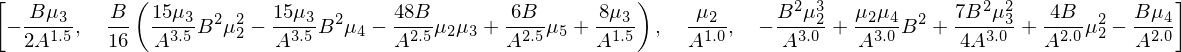

In [16]:
[k12, k13.factor(), k21, k22]  

In [17]:
# step 2 in roadmap
btn = kap1*it + kap2*(it)**2/factorial(2) + kap3*(it)**3/factorial(3) + kap4*(it)**4/factorial(4) # + kap5*(it)**5/factorial(5) + kap6*(it)**6/factorial(6)
btn = btn.expand() - btn.expand().coeff(n, 0)

In [18]:
b1 = trunc2(btn, -1)
b2 = trunc2(b1**2, -1)
#b1 = btn
#b2 = trunc2(b1**2, -2)
#b3 = trunc2(b1*b2, -2)
#b4 = trunc2(b2**2, -2)

In [19]:
expb = 1 + b1 + 1/factorial(2)*b2 #+ 1/factorial(3)*b3 + 1/factorial(4)*b4
expb = collect_it(expb, -1)

In [20]:
e3 = (- lambda3 + mu3/mu2**(3/2))
e4 = (- lambda4 + mu4/mu2**2 - 3)
#e5 = (- lambda5 + mu5/mu2**2/sqrt(mu2) - 10*mu3/mu2**(3/2))
#e6 = (- lambda6 + mu6/mu2**3 - 15*mu4/mu2**2 - 10*mu3**2/mu2**3 + 30)

In [21]:
#expb = expb.subs(mu6, solve(e6, mu6)[0])
#expb = expb.subs(mu5, solve(e5, mu5)[0])
expb = expb.subs(mu4, solve(e4, mu4)[0])
expb = expb.subs(mu3, solve(e3, mu3)[0])

In [22]:
h0 = hermite_prob(0)
h1 = hermite_prob(1)
h2 = hermite_prob(2)
h3 = hermite_prob(3)
h4 = hermite_prob(4)
h5 = hermite_prob(5)
h6 = hermite_prob(6)
h7 = hermite_prob(7)
h8 = hermite_prob(8)
h9 = hermite_prob(9)
h10 = hermite_prob(10)
h11 = hermite_prob(11)
h12 = hermite_prob(12)

In [23]:
import re
str_expb = str(expb) 
#str_expb = re.sub("it\**12", str(-h11.subs(x, x/r)/r**12), str_expb)
#str_expb = re.sub("it\**11", str(-h10.subs(x, x/r)/r**11), str_expb)
#str_expb = re.sub("it\**10", str(-h9.subs(x, x/r)/r**10), str_expb)
#str_expb = re.sub("it\**9", str(-h8.subs(x, x/r)/r**9), str_expb)
#str_expb = re.sub("it\**8", str(-h7.subs(x, x/r)/r**8), str_expb)
#str_expb = re.sub("it\**7", str(-h6.subs(x, x/r)/r**7), str_expb)
str_expb = re.sub("it\**6", str(-h5.subs(x, x/r)/r**6), str_expb)
str_expb = re.sub("it\**5", str(-h4.subs(x, x/r)/r**5), str_expb)
str_expb = re.sub("it\**4", str(-h3.subs(x, x/r)/r**4), str_expb)
str_expb = re.sub("it\**3", str(-h2.subs(x, x/r)/r**3), str_expb)
str_expb = re.sub("it\**2", str(-h1.subs(x, x/r)/r**2), str_expb)
str_expb = re.sub("it", str(-h0.subs(x, x/r)/r), str_expb)
ex = sympify(str_expb)
#type(str_expb)

In [24]:
q1 = ex.coeff(n**(-1/2)).expand().collect(lambda3)
q2 = ex.coeff(n**(-2/2)).expand().collect(lambda3).collect(lambda4)
#q3 = ex.coeff(n**(-3/2)).expand().collect(lambda3).collect(lambda4).collect(lambda5)
#q4 = ex.coeff(n**(-4/2)).expand().collect(lambda3).collect(lambda4).collect(lambda5).collect(lambda6)

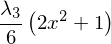

In [25]:
q1.subs(A, mu2).subs(B, 1).subs(r, 1).factor()

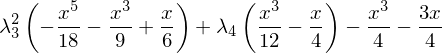

In [26]:
q2.subs(A, mu2).subs(B, 1).subs(r, 1)